<a href="https://colab.research.google.com/github/nehat005/Tensorflow_coding/blob/main/traffic_signal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from skimage import data, io, filters
import matplotlib.pyplot as plt

In [2]:
!wget -cq https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
!wget -cq https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip


In [ ]:
!unzip BelgiumTSC_Training.zip
!unzip BelgiumTSC_Testing.zip

# Loading and Exploring The Data


In [30]:
def load_raw_image_data(dataset_path):
  # print(dataset_path)
  directories = sorted([directory for directory in os.listdir(dataset_path)
           if os.path.isdir(os.path.join(dataset_path, directory))])
  images = []
  labels = []

  for dir in directories: # dir is a string here
    #from string to os directory:
    # print(dir)
    dir_ = os.path.join(dataset_path, dir)
    for files in os.listdir(dir_):
      if files.endswith(".ppm"):
        img_data = io.imread(os.path.join(dir_, files))
        images.append(img_data)
        labels.append(int(dir))

  return images, labels



ROOT = '/content/'
train_path = os.path.join(ROOT, "Training/")
test_path = os.path.join(ROOT, "Testing")
train_X, train_Y = load_raw_image_data(train_path)
test_X, test_Y = load_raw_image_data(test_path)

## Pre-process images


1.   Reshape images to a fixed size
2.   Use grayscale



In [31]:
from skimage import transform

images28 = [transform.resize(image, (28,28)) for image in train_X]
images28 = np.array(images28)
print(images28.shape)

test_X = np.array([transform.resize(image, (28,28)) for image in test_X])

(4575, 28, 28, 3)


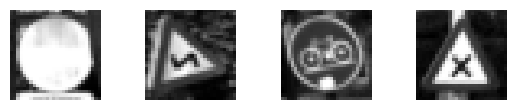

In [32]:
from skimage.color import rgb2gray

images28_rgb = np.stack([rgb2gray(images28[i]) for i in range(len(images28))])
testX_grayscale = np.stack([rgb2gray(test_X[i]) for i in range(len(test_X))])
np.random.seed(4)
traffic_signs = np.random.choice(images28_rgb.shape[0], 4)

for i in range(len(traffic_signs)):
  plt.subplot(1, 4, i+1)
  plt.axis('off')
  plt.imshow(images28_rgb[traffic_signs[i]], cmap = 'gray')
  plt.subplots_adjust(wspace = 0.5)

plt.show()

#Modelling the classifier

In [33]:
NUM_CLASSES = len(np.unique(train_Y))
print(NUM_CLASSES)

y_train = tf.keras.utils.to_categorical(train_Y, num_classes=NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(test_Y, num_classes=NUM_CLASSES)

62


In [35]:
classifier_model = tf.keras.Sequential()
classifier_model.add(tf.keras.layers.Flatten())
classifier_model.add(tf.keras.layers.Dense(512, activation="relu"))
classifier_model.add(tf.keras.layers.Dense(256, activation="relu"))
classifier_model.add(tf.keras.layers.Dense(128, activation="relu"))
classifier_model.add(tf.keras.layers.Dense(NUM_CLASSES, activation = 'sigmoid'))

classifier_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [36]:
print(images28_rgb.shape, y_train.shape)

(4575, 28, 28) (4575, 62)


In [37]:
classifier_model.fit(images28_rgb, y_train, epochs = 100)

Epoch 1/100
143/143 [==============================] - 2s 10ms/step - loss: 3.4323 - accuracy: 0.2175
Epoch 2/100
143/143 [==============================] - 1s 10ms/step - loss: 2.5861 - accuracy: 0.4337
Epoch 3/100
143/143 [==============================] - 1s 10ms/step - loss: 2.0405 - accuracy: 0.5668
Epoch 4/100
143/143 [==============================] - 1s 10ms/step - loss: 1.6792 - accuracy: 0.6402
Epoch 5/100
143/143 [==============================] - 1s 10ms/step - loss: 1.4142 - accuracy: 0.6881
Epoch 6/100
143/143 [==============================] - 2s 13ms/step - loss: 1.2269 - accuracy: 0.7261
Epoch 7/100
143/143 [==============================] - 2s 13ms/step - loss: 1.0797 - accuracy: 0.7672
Epoch 8/100
143/143 [==============================] - 1s 10ms/step - loss: 0.9744 - accuracy: 0.7858
Epoch 9/100
143/143 [==============================] - 1s 10ms/step - loss: 0.8700 - accuracy: 0.8042
Epoch 10/100
143/143 [==============================] - 1s 10ms/step - loss: 0.790

## Evaluate on test data

In [40]:
results = classifier_model.evaluate(testX_grayscale, y_test, batch_size=64)
print("Test loss: {}, Test accuracy: {}".format(results[0], results[1]))

40/40 [==============================] - 1s 9ms/step - loss: 0.5562 - accuracy: 0.8992
Test loss: 0.5561873316764832, Test accuracy: 0.8992063403129578


In [46]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = classifier_model.predict(testX_grayscale[:3])
print("predictions shape:", predictions.shape)
print('Predictions: {} True Labels: {}'.format([np.argmax(x) for x in predictions], [np.argmax(x) for x in y_test[:3]]))

Generate predictions for 3 samples
1/1 [==============================] - 0s 61ms/step
predictions shape: (3, 62)
Predictions: [0, 1, 0] True Labels: [0, 0, 0]
